<a href="https://colab.research.google.com/github/Karl-237/Project_Commo/blob/main/Commo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
This notebook presents a strategy for commodity investment analysis. We will go through the data loading, processing, and visualization steps to understand the performance of various commodity indices."

In [ ]:
import pandas as pd

# Load the data from each CSV file
commodity_data = pd.read_csv('/content/Bloomberg_Commodity.csv')
copper_data = pd.read_csv('/content/Bloomberg_Copper.csv')
gold_data = pd.read_csv('/content/Bloomberg_Gold.csv')
softs_data = pd.read_csv('/content/Bloomberg_Softs.csv')
wheat_data = pd.read_csv('/content/Bloomberg_WTI_Crude_Oil.csv')
wti_crude_oil_data = pd.read_csv('/content/Bloomberg_Wheat.csv')
natural_gas_data = pd.read_csv('/content/Natural_Gas.csv')

# Preview the first few rows of each dataframe
(commodity_data.head(), copper_data.head(), gold_data.head(), softs_data.head(), wheat_data.head(), wti_crude_oil_data.head(), natural_gas_data.head())


(         Date     Price      Open      High       Low  Vol. Change %
 0  04/08/2024  102.8174  102.2734  103.2044  102.2498   NaN   -0.08%
 1  04/05/2024  102.8961  101.7646  103.1870  101.7599   NaN    0.62%
 2  04/04/2024  102.2595  102.2396  102.3143  101.6018   NaN    0.34%
 3  04/03/2024  101.9094  100.9001  102.1107  100.8030   NaN    1.20%
 4  04/02/2024  100.6986  100.1451  101.0483  100.0623   NaN    0.79%,
          Date   Price    Open    High     Low  Vol. Change %
 0  04/08/2024  371.20  365.83  373.55  364.95   NaN    0.92%
 1  04/05/2024  367.82  362.22  368.08  362.18   NaN   -0.31%
 2  04/04/2024  368.95  368.21  369.56  365.52   NaN    1.31%
 3  04/03/2024  364.17  354.27  364.61  353.36   NaN    3.03%
 4  04/02/2024  353.45  351.45  355.62  350.97   NaN    0.54%,
          Date   Price    Open    High     Low  Vol. Change %
 0  04/08/2024  233.29  232.78  235.52  232.17   NaN    0.17%
 1  04/05/2024  232.91  227.45  233.33  227.38   NaN    1.60%
 2  04/04/2024  229.

<ipython-input-136-6bd383d2ed02>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


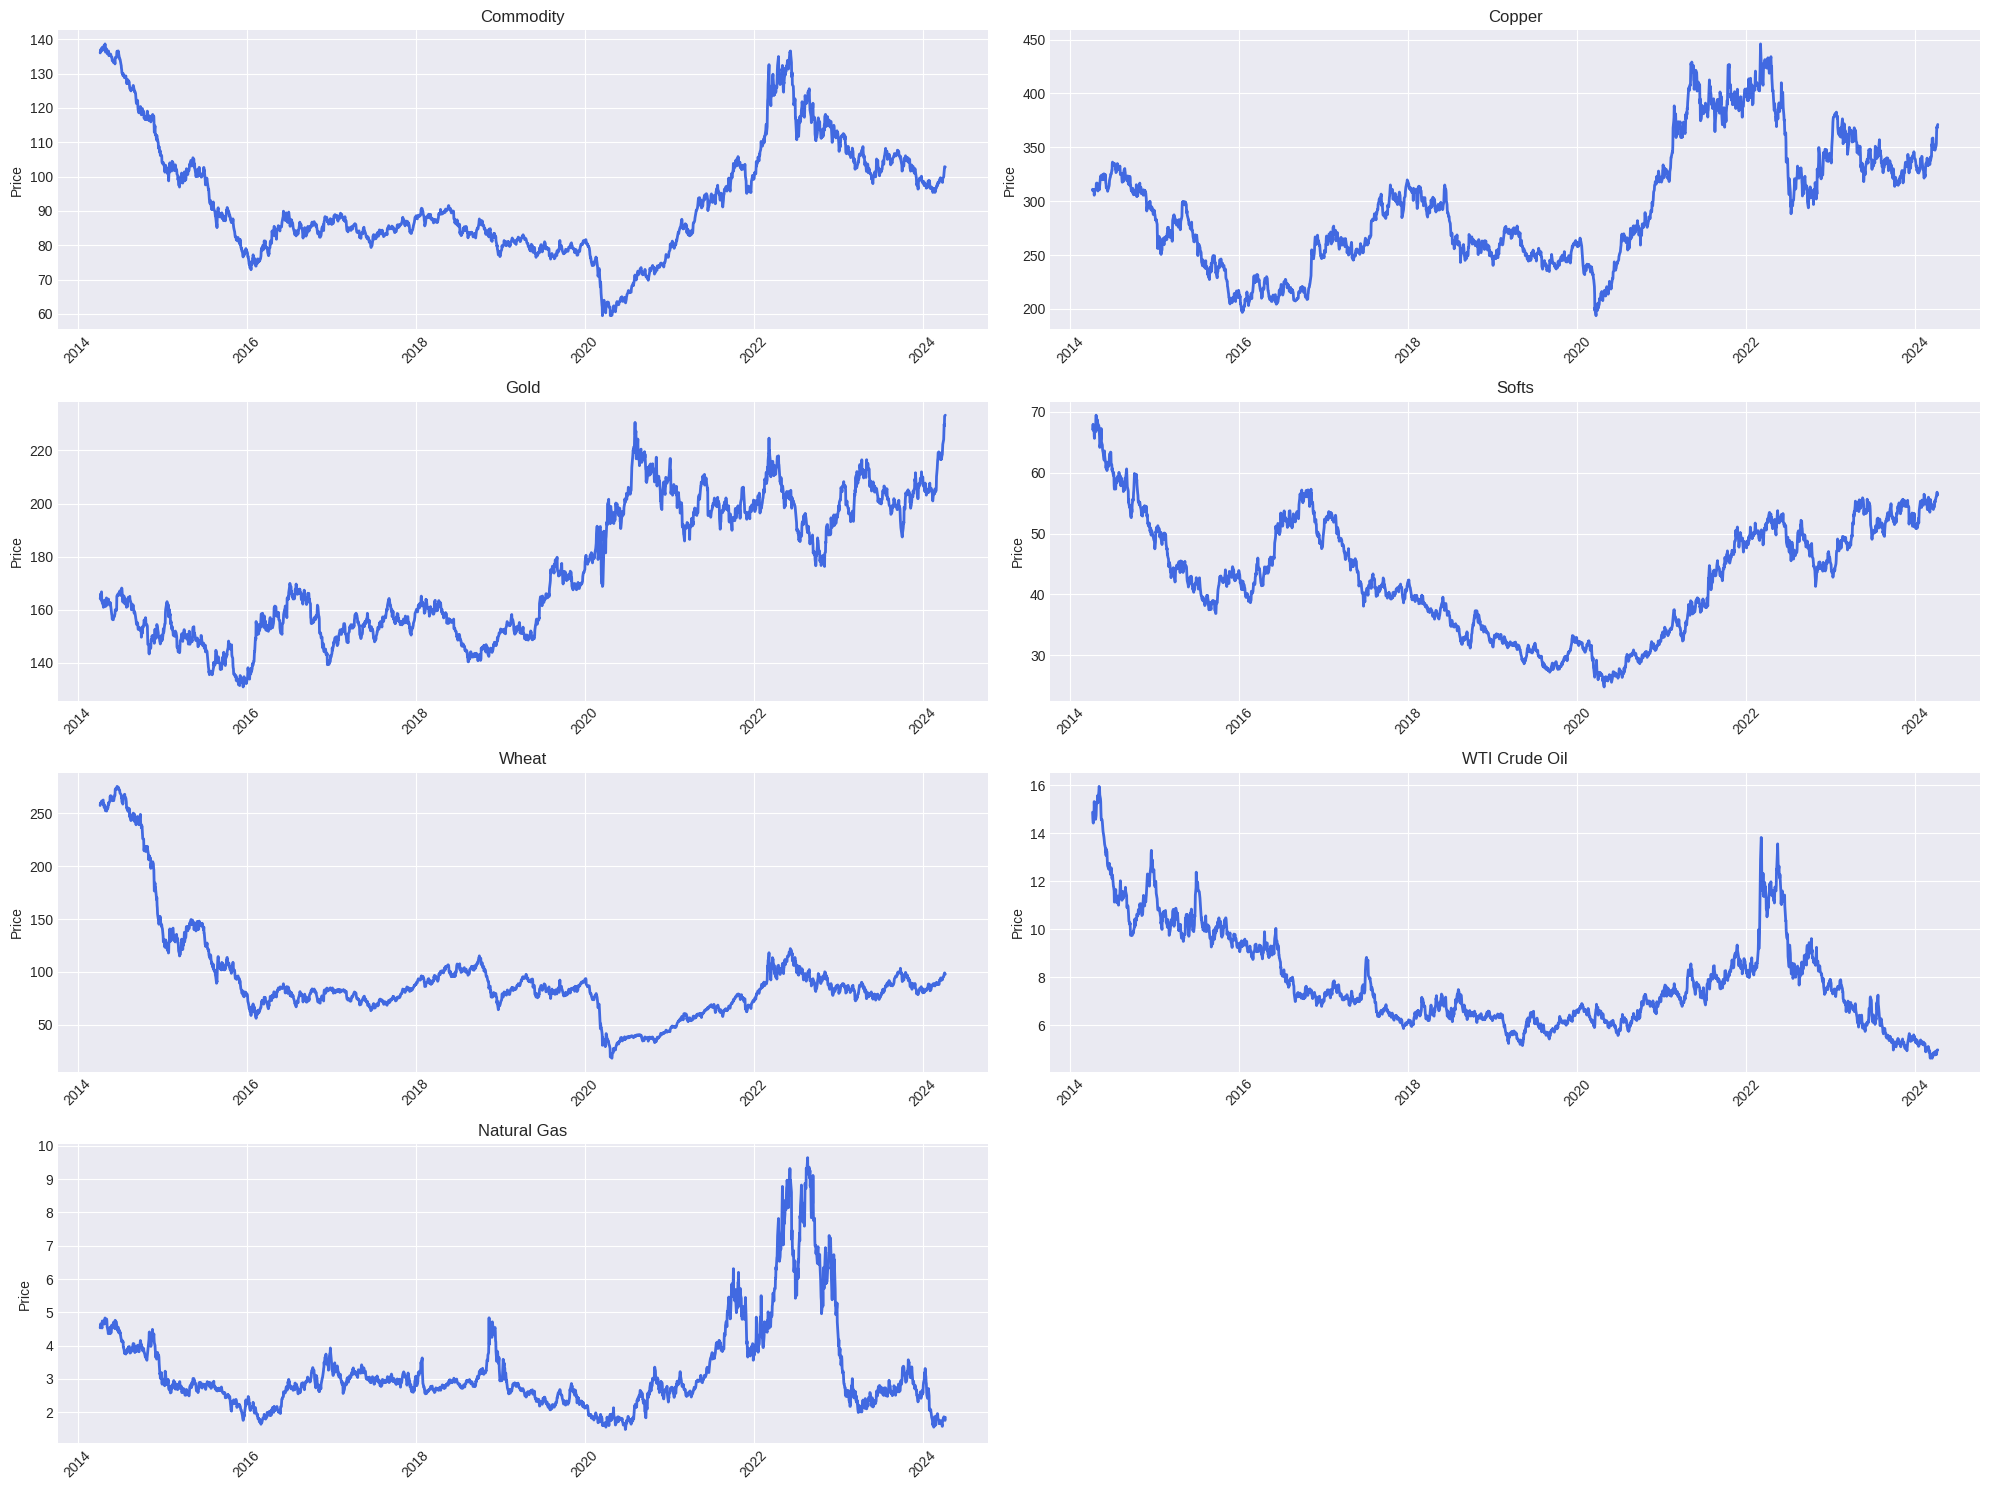

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 15))

datasets = [commodity_data, copper_data, gold_data, softs_data, wheat_data, wti_crude_oil_data, natural_gas_data]
titles = ['Commodity', 'Copper', 'Gold', 'Softs', 'Wheat', 'WTI Crude Oil', 'Natural Gas']

for i, data in enumerate(datasets):
    plt.subplot(4, 2, i+1)
    data['Date'] = pd.to_datetime(data['Date'])
    plt.plot(data['Date'], data['Price'], marker='', color='royalblue', linewidth=2)
    plt.title(titles[i])
    plt.xticks(rotation=45)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

## Weight Adjustment
In this section, we initialize a DataFrame to store adjusted weights for our strategy. It's crucial for the rebalancing process in a momentum-based investment strategy."

In [ ]:
import numpy as np

def calculate_log_returns(df):
    df['Log_Returns'] = np.log(df['Price'] / df['Price'].shift(-1))
    return df

commodity_data = calculate_log_returns(commodity_data)
copper_data = calculate_log_returns(copper_data)
gold_data = calculate_log_returns(gold_data)
softs_data = calculate_log_returns(softs_data)
wheat_data = calculate_log_returns(wheat_data)
wti_crude_oil_data = calculate_log_returns(wti_crude_oil_data)
natural_gas_data = calculate_log_returns(natural_gas_data)

volatilities = {
    'Commodity': commodity_data['Log_Returns'].std(),
    'Copper': copper_data['Log_Returns'].std(),
    'Gold': gold_data['Log_Returns'].std(),
    'Softs': softs_data['Log_Returns'].std(),
    'Wheat': wheat_data['Log_Returns'].std(),
    'WTI Crude Oil': wti_crude_oil_data['Log_Returns'].std(),
    'Natural Gas': natural_gas_data['Log_Returns'].std()
}

returns_df = pd.DataFrame({
    'Commodity': commodity_data['Log_Returns'],
    'Copper': copper_data['Log_Returns'],
    'Gold': gold_data['Log_Returns'],
    'Softs': softs_data['Log_Returns'],
    'Wheat': wheat_data['Log_Returns'],
    'WTI Crude Oil': wti_crude_oil_data['Log_Returns'],
    'Natural Gas': natural_gas_data['Log_Returns']
})
price_df = pd.DataFrame({
    'Commodity': commodity_data['Price'],
    'Copper': copper_data['Price'],
    'Gold': gold_data['Price'],
    'Softs': softs_data['Price'],
    'Wheat': wheat_data['Price'],
    'WTI Crude Oil': wti_crude_oil_data['Price'],
    'Natural Gas': natural_gas_data['Price']
})
# Calculer la matrice de corrélation
correlation_matrix = returns_df.corr()

(volatilities, correlation_matrix)

({'Commodity': 0.009174951717732437,
  'Copper': 0.013397543455605641,
  'Gold': 0.009149961028350138,
  'Softs': 0.012676292015253984,
  'Wheat': 0.02745643286338391,
  'WTI Crude Oil': 0.018669826527423043,
  'Natural Gas': 0.03546454216377013},
                Commodity    Copper      Gold     Softs     Wheat  \
 Commodity       1.000000  0.514360  0.348169  0.435651  0.728461   
 Copper          0.514360  1.000000  0.207801  0.258497  0.313963   
 Gold            0.348169  0.207801  1.000000  0.125112  0.100160   
 Softs           0.435651  0.258497  0.125112  1.000000  0.251398   
 Wheat           0.728461  0.313963  0.100160  0.251398  1.000000   
 WTI Crude Oil   0.384014  0.093529  0.092814  0.204370  0.135232   
 Natural Gas    -0.000260  0.005171  0.016363  0.006809 -0.023173   
 
                WTI Crude Oil  Natural Gas  
 Commodity           0.384014    -0.000260  
 Copper              0.093529     0.005171  
 Gold                0.092814     0.016363  
 Softs            

In [ ]:
import pandas as pd

data['Date'] = pd.to_datetime(data['Date'])



In [ ]:
jours_reb = 30
market_return = returns_df.mean(axis=1)  # Moyenne des rendements de tous les actifs par jour

# Calcul de la volatilité et du momentum sur des fenêtres glissantes de 1 mois
volatility_m = returns_df.rolling(window=jours_reb).std()
momentum_m = returns_df.pct_change(periods=jours_reb - 1)  # Ajustement pour obtenir la bonne période

# Calcul de la corrélation de chaque actif avec la moyenne du marché
correlation_with_market = returns_df.rolling(window=jours_reb).corr(market_return)


In [ ]:
# Initialisation d'un DataFrame pour stocker les poids ajustés
weights_df = pd.DataFrame(index=returns_df.index, columns=returns_df.columns)

seuil_momentum = 0  # Seuil pour déterminer les positions longues et courtes

for date in returns_df.index[jours_reb - 1::jours_reb]:
    vol = volatility_m.loc[date]
    mom = momentum_m.loc[date]
    corr = correlation_with_market.loc[date]

    # Déterminer les positions longues et courtes basées sur le momentum
    positions = mom.apply(lambda x: 1 if x > seuil_momentum else -1)

    # Ajuster les poids : la magnitude est basée sur l'inverse de la volatilité et ajustée pour la corrélation
    # Les poids sont positifs ou négatifs selon la position
    weights = positions * (1 / vol) * (1 - corr.abs())
    weights /= weights.abs().sum()  # Normalisation des poids pour que la somme des valeurs absolues soit 1

    weights_df.loc[date] = weights

weights_df.fillna(method='ffill', inplace=True)
 # Propagation des poids jusqu'au prochain rééquilibrage

In [ ]:
# Appliquer les poids pour obtenir les rendements pondérés et calculer l'indice

weighted_returns = (returns_df * weights_df.shift(1)).sum(axis=1)  # Décaler les poids pour appliquer au jour suivant
indice = (1 + weighted_returns).cumprod()
indice.index = pd.to_datetime(data['Date'])  # Calculer l'indice cumulatif à partir des rendements pondérés

## Visualization and Analyze
Now we visualize the performance of our weighted index. The following plots will provide a clear picture of the trend over time."

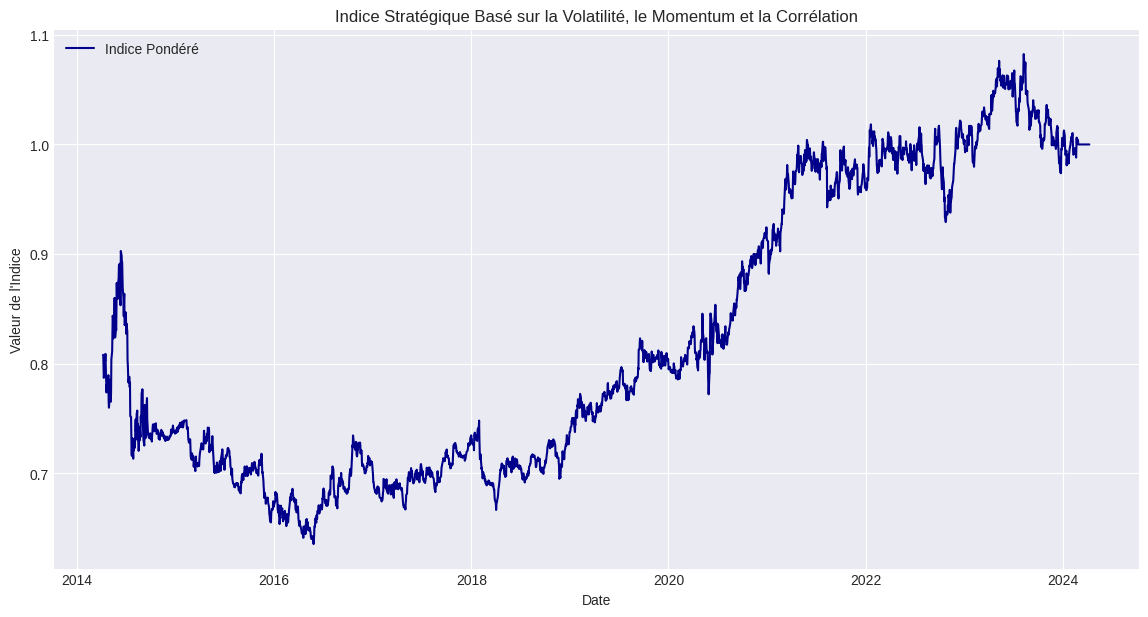

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(indice.index, indice, label='Indice Pondéré', color='darkblue')
plt.title('Indice Stratégique Basé sur la Volatilité, le Momentum et la Corrélation')
plt.xlabel('Date')
plt.ylabel('Valeur de l\'Indice')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

rendements_quotidiens = indice.pct_change()

rendements_annuels = (1 + rendements_quotidiens).resample('Y').prod() - 1

# Taux de rendement sans risque (ex: taux d'un bon du Trésor US à 3 mois)
taux_sans_risque = 0.01  # Adaptez cette valeur selon vos besoins

# Calcul de la volatilité annuelle (écart-type des rendements quotidiens)
volatilite_annuelle = rendements_quotidiens.resample('Y').std() * np.sqrt(252)

# Calcul du ratio de Sharpe annuel
# Ratio de Sharpe = (Rendement de l'actif - Taux sans risque) / Volatilité de l'actif
ratio_sharpe_annuel = (rendements_annuels - taux_sans_risque) / volatilite_annuelle

print("Rendements annuels:\n", rendements_annuels)
print("Volatilité annuelle:\n", volatilite_annuelle)
print("Ratio de Sharpe annuel:\n", ratio_sharpe_annuel)

Rendements annuels:
 Date
2014-12-31   -0.088829
2015-12-31   -0.094326
2016-12-31    0.051967
2017-12-31    0.048572
2018-12-31    0.004250
2019-12-31    0.090383
2020-12-31    0.141869
2021-12-31    0.053725
2022-12-31    0.044233
2023-12-31    0.001920
2024-12-31    0.001313
Freq: A-DEC, dtype: float64
Volatilité annuelle:
 Date
2014-12-31    0.225070
2015-12-31    0.092182
2016-12-31    0.103016
2017-12-31    0.074545
2018-12-31    0.084754
2019-12-31    0.086125
2020-12-31    0.116676
2021-12-31    0.110542
2022-12-31    0.104312
2023-12-31    0.094985
2024-12-31    0.066020
Freq: A-DEC, dtype: float64
Ratio de Sharpe annuel:
 Date
2014-12-31   -0.439104
2015-12-31   -1.131740
2016-12-31    0.407379
2017-12-31    0.517438
2018-12-31   -0.067845
2019-12-31    0.933329
2020-12-31    1.130216
2021-12-31    0.395550
2022-12-31    0.328174
2023-12-31   -0.085069
2024-12-31   -0.131577
Freq: A-DEC, dtype: float64
